In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

import seaborn as sns

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# 数据抽取

In [45]:
import pandas as pd

In [46]:
df1 = pd.read_csv('2019-Nov.csv')

FileNotFoundError: [Errno 2] No such file or directory: '2019-Nov.csv'

In [8]:
df2 = pd.read_csv('2019-Oct.csv')

In [9]:
df=pd.concat([df1,df2])

In [11]:
train=df.sample(n=10000)

In [13]:
train.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
23246316,2019-11-13 20:38:32 UTC,view,27700714,2053013560086233771,construction.tools.pump,magnetta,105.09,514828567,2dc7ccfb-4224-4ec1-9076-0d050606097c
4713333,2019-10-04 16:48:44 UTC,view,1004767,2053013555631882655,electronics.smartphone,samsung,252.63,512657465,d6358e16-2186-4fd0-bb5c-2e644d0e064c
52190582,2019-11-21 15:53:43 UTC,view,1005212,2053013555631882655,electronics.smartphone,samsung,175.00,571496244,e95fca70-79bb-4701-bfe0-91c57613dfd3
59029472,2019-11-26 03:45:24 UTC,view,1005158,2053013555631882655,electronics.smartphone,xiaomi,282.63,573260837,aba54944-e843-48cf-87ec-80c2e9fe2ea9
3574707,2019-10-04 01:05:43 UTC,view,5100738,2053013553341792533,electronics.clocks,samsung,154.16,514605532,87bca6e9-997e-4e51-837b-d9f361ee00fc


In [12]:
train.to_csv('training set.csv',index=0,sep=',')

# Data Preprocessing

In [52]:
train=pd.read_csv('training set.csv')

In [53]:
train['event_time']=[x[11:13] for x in train['event_time']]
train

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,20,view,27700714,2.053010e+18,construction.tools.pump,magnetta,105.09,514828567,2dc7ccfb-4224-4ec1-9076-0d050606097c
1,16,view,1004767,2.053010e+18,electronics.smartphone,samsung,252.63,512657465,d6358e16-2186-4fd0-bb5c-2e644d0e064c
2,15,view,1005212,2.053010e+18,electronics.smartphone,samsung,175.00,571496244,e95fca70-79bb-4701-bfe0-91c57613dfd3
3,03,view,1005158,2.053010e+18,electronics.smartphone,xiaomi,282.63,573260837,aba54944-e843-48cf-87ec-80c2e9fe2ea9
4,01,view,5100738,2.053010e+18,electronics.clocks,samsung,154.16,514605532,87bca6e9-997e-4e51-837b-d9f361ee00fc
...,...,...,...,...,...,...,...,...,...
9995,11,view,100003371,2.053010e+18,accessories.bag,tonybellucci,55.86,524296224,e7ef3a84-64b5-4c9f-b27c-894c0ef6a7b0
9996,05,view,13200459,2.053010e+18,furniture.bedroom.bed,NaN,808.23,522335319,d62fa404-472f-4d16-86e3-30873252a804
9997,13,view,17200422,2.053010e+18,furniture.living_room.sofa,divalux,888.05,545077342,58019e66-c42c-409c-8bfc-ed724783b3ac
9998,04,view,26400540,2.053010e+18,NaN,NaN,277.74,575758552,fa55009e-b22a-46f4-9ce6-9711fdba6634


In [54]:
train 

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,20,view,27700714,2.053010e+18,construction.tools.pump,magnetta,105.09,514828567,2dc7ccfb-4224-4ec1-9076-0d050606097c
1,16,view,1004767,2.053010e+18,electronics.smartphone,samsung,252.63,512657465,d6358e16-2186-4fd0-bb5c-2e644d0e064c
2,15,view,1005212,2.053010e+18,electronics.smartphone,samsung,175.00,571496244,e95fca70-79bb-4701-bfe0-91c57613dfd3
3,03,view,1005158,2.053010e+18,electronics.smartphone,xiaomi,282.63,573260837,aba54944-e843-48cf-87ec-80c2e9fe2ea9
4,01,view,5100738,2.053010e+18,electronics.clocks,samsung,154.16,514605532,87bca6e9-997e-4e51-837b-d9f361ee00fc
...,...,...,...,...,...,...,...,...,...
9995,11,view,100003371,2.053010e+18,accessories.bag,tonybellucci,55.86,524296224,e7ef3a84-64b5-4c9f-b27c-894c0ef6a7b0
9996,05,view,13200459,2.053010e+18,furniture.bedroom.bed,NaN,808.23,522335319,d62fa404-472f-4d16-86e3-30873252a804
9997,13,view,17200422,2.053010e+18,furniture.living_room.sofa,divalux,888.05,545077342,58019e66-c42c-409c-8bfc-ed724783b3ac
9998,04,view,26400540,2.053010e+18,NaN,NaN,277.74,575758552,fa55009e-b22a-46f4-9ce6-9711fdba6634


In [55]:
for i in range(0,len(train['event_time'])):
    if 0<=int(train['event_time'][i])<6:
        train.loc[i,'event_time'] = 'midnight'
    elif 6<=int(train['event_time'][i])<12:
        train.loc[i,'event_time'] = 'forenoon'
    elif 12<=int(train['event_time'][i])<18:
        train.loc[i,'event_time'] = 'afternoon'
    elif 18<=int(train['event_time'][i])<=24:
        train.loc[i,'event_time'] = 'evening'

In [56]:
train.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,evening,view,27700714,2.053010e+18,construction.tools.pump,magnetta,105.09,514828567,2dc7ccfb-4224-4ec1-9076-0d050606097c
1,afternoon,view,1004767,2.053010e+18,electronics.smartphone,samsung,252.63,512657465,d6358e16-2186-4fd0-bb5c-2e644d0e064c
2,afternoon,view,1005212,2.053010e+18,electronics.smartphone,samsung,175.00,571496244,e95fca70-79bb-4701-bfe0-91c57613dfd3
3,midnight,view,1005158,2.053010e+18,electronics.smartphone,xiaomi,282.63,573260837,aba54944-e843-48cf-87ec-80c2e9fe2ea9
4,midnight,view,5100738,2.053010e+18,electronics.clocks,samsung,154.16,514605532,87bca6e9-997e-4e51-837b-d9f361ee00fc


In [67]:
train=train.dropna()
train

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,evening,view,27700714,2.053010e+18,construction.tools.pump,magnetta,105.09,514828567,2dc7ccfb-4224-4ec1-9076-0d050606097c
1,afternoon,view,1004767,2.053010e+18,electronics.smartphone,samsung,252.63,512657465,d6358e16-2186-4fd0-bb5c-2e644d0e064c
2,afternoon,view,1005212,2.053010e+18,electronics.smartphone,samsung,175.00,571496244,e95fca70-79bb-4701-bfe0-91c57613dfd3
3,midnight,view,1005158,2.053010e+18,electronics.smartphone,xiaomi,282.63,573260837,aba54944-e843-48cf-87ec-80c2e9fe2ea9
4,midnight,view,5100738,2.053010e+18,electronics.clocks,samsung,154.16,514605532,87bca6e9-997e-4e51-837b-d9f361ee00fc
...,...,...,...,...,...,...,...,...,...
9992,afternoon,view,21406908,2.053010e+18,electronics.clocks,tissot,391.26,513857219,5686b42e-5891-414d-bb05-49b05f3212c5
9994,evening,view,18300215,2.053010e+18,accessories.bag,xiaomi,9.76,545587056,cbe2c704-1a1c-4e17-ba5f-db9d09705065
9995,forenoon,view,100003371,2.053010e+18,accessories.bag,tonybellucci,55.86,524296224,e7ef3a84-64b5-4c9f-b27c-894c0ef6a7b0
9997,afternoon,view,17200422,2.053010e+18,furniture.living_room.sofa,divalux,888.05,545077342,58019e66-c42c-409c-8bfc-ed724783b3ac


In [70]:
train["event_time"].value_counts()

afternoon    2345
forenoon     2017
midnight     1075
evening       791
Name: event_time, dtype: int64

In [20]:
train["event_type"].value_counts()

view        5854
cart         256
purchase     118
Name: event_type, dtype: int64

In [21]:
train.describe()

,product_id,category_id,price,user_id
count,6.228000e+03,6.228000e+03,6228.000000,6.228000e+03
mean,6.051346e+06,2.055782e+18,353.794957,5.367827e+08
std,1.099331e+07,1.618783e+16,377.739536,2.107003e+07
min,1.000978e+06,2.053010e+18,0.870000,4.093218e+08
25%,1.004958e+06,2.053010e+18,109.400000,5.163127e+08
50%,1.801805e+06,2.053010e+18,217.900000,5.326556e+08
75%,5.100375e+06,2.053010e+18,460.480000,5.559821e+08
max,1.000205e+08,2.173220e+18,2574.040000,5.798982e+08


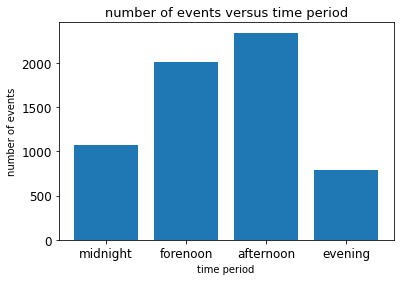

In [72]:
length1 = train["event_time"].value_counts()[2]
length2 = train["event_time"].value_counts()[1]
length3 = train["event_time"].value_counts()[0]
length4 = train["event_time"].value_counts()[3]

data = pd.DataFrame({'midnight':[length1],'forenoon':[length2],'afternoon':[length3],'evening':[length4]})
fig,ax = plt.subplots()
ax.bar(range(4),data.sum())
ax.set_xticks(range(4))
ax.set_xticklabels(data.columns)
ax.set_xlabel('time period',fontsize=10)
ax.set_ylabel('number of events',fontsize=10)
plt.title('number of events versus time period',fontsize=13)
plt.show()

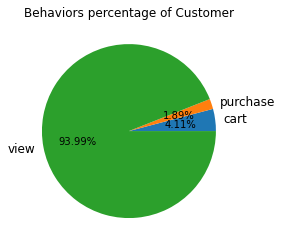

In [73]:
pie_chart = train.groupby('event_type').size().reset_index(name = 'temp')
plt.pie(pie_chart['temp'], labels = pie_chart['event_type'],autopct = '%1.2f%%')
plt.title('Behaviors percentage of Customer')
plt.show()

<Figure size 1440x1440 with 0 Axes>

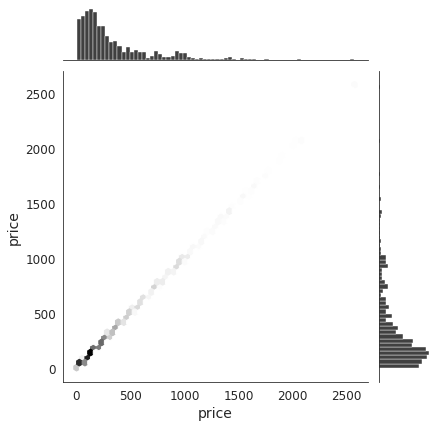

In [79]:
# hex graph
fig = plt.figure('Graph', figsize = (20,20))
fig.subplots_adjust(wspace = 0.5, hspace = 0.5)

x = df.iloc[:-1,6]
y = df.iloc[1:,6]

with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k")

# 分出Xtrain，Ytrain

In [22]:
X= train.drop('event_type',axis=1)
Y=train.iloc[:,1]

In [23]:
X

,event_time,product_id,category_id,category_code,brand,price,user_id,user_session
0,evening,27700714,2.053010e+18,construction.tools.pump,magnetta,105.09,514828567,2dc7ccfb-4224-4ec1-9076-0d050606097c
1,afternoon,1004767,2.053010e+18,electronics.smartphone,samsung,252.63,512657465,d6358e16-2186-4fd0-bb5c-2e644d0e064c
2,afternoon,1005212,2.053010e+18,electronics.smartphone,samsung,175.00,571496244,e95fca70-79bb-4701-bfe0-91c57613dfd3
3,midnight,1005158,2.053010e+18,electronics.smartphone,xiaomi,282.63,573260837,aba54944-e843-48cf-87ec-80c2e9fe2ea9
4,midnight,5100738,2.053010e+18,electronics.clocks,samsung,154.16,514605532,87bca6e9-997e-4e51-837b-d9f361ee00fc
...,...,...,...,...,...,...,...,...
9992,afternoon,21406908,2.053010e+18,electronics.clocks,tissot,391.26,513857219,5686b42e-5891-414d-bb05-49b05f3212c5
9994,evening,18300215,2.053010e+18,accessories.bag,xiaomi,9.76,545587056,cbe2c704-1a1c-4e17-ba5f-db9d09705065
9995,forenoon,100003371,2.053010e+18,accessories.bag,tonybellucci,55.86,524296224,e7ef3a84-64b5-4c9f-b27c-894c0ef6a7b0
9997,afternoon,17200422,2.053010e+18,furniture.living_room.sofa,divalux,888.05,545077342,58019e66-c42c-409c-8bfc-ed724783b3ac


In [24]:
Y

0       view
1       view
2       view
3       view
4       view
        ... 
9992    view
9994    view
9995    view
9997    view
9999    view
Name: event_type, Length: 6228, dtype: object

### LabelEncoder

In [25]:
product_tags = X.iloc[:, 0]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #实例化
le = le.fit(product_tags)
label = le.transform(product_tags)
X.iloc[:, 0] = label

product_tags = X.iloc[:, 3]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #实例化
le = le.fit(product_tags)
label = le.transform(product_tags)
X.iloc[:, 3] = label

product_tags = X.iloc[:, 4]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #实例化
le = le.fit(product_tags)
label = le.transform(product_tags)
X.iloc[:, 4] = label

product_tags = X.iloc[:, 7]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #实例化
le = le.fit(product_tags)
label = le.transform(product_tags)
X.iloc[:, 7] = label

In [26]:
X

,event_time,product_id,category_id,category_code,brand,price,user_id,user_session
0,1,27700714,2.053010e+18,69,281,105.09,514828567,1120
1,0,1004767,2.053010e+18,81,398,252.63,512657465,5199
2,0,1005212,2.053010e+18,81,398,175.00,571496244,5657
3,3,1005158,2.053010e+18,81,488,282.63,573260837,4163
4,3,5100738,2.053010e+18,80,398,154.16,514605532,3282
...,...,...,...,...,...,...,...,...
9992,0,21406908,2.053010e+18,80,458,391.26,513857219,2124
9994,1,18300215,2.053010e+18,0,488,9.76,545587056,4948
9995,2,100003371,2.053010e+18,0,460,55.86,524296224,5621
9997,0,17200422,2.053010e+18,95,137,888.05,545077342,2157


In [41]:
Y

0       view
1       view
2       view
3       view
4       view
        ... 
9992    view
9994    view
9995    view
9997    view
9999    view
Name: event_type, Length: 6228, dtype: object

In [42]:
df=train.copy()
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,evening,view,27700714,2.053010e+18,construction.tools.pump,magnetta,105.09,514828567,2dc7ccfb-4224-4ec1-9076-0d050606097c
1,afternoon,view,1004767,2.053010e+18,electronics.smartphone,samsung,252.63,512657465,d6358e16-2186-4fd0-bb5c-2e644d0e064c
2,afternoon,view,1005212,2.053010e+18,electronics.smartphone,samsung,175.00,571496244,e95fca70-79bb-4701-bfe0-91c57613dfd3
3,midnight,view,1005158,2.053010e+18,electronics.smartphone,xiaomi,282.63,573260837,aba54944-e843-48cf-87ec-80c2e9fe2ea9
4,midnight,view,5100738,2.053010e+18,electronics.clocks,samsung,154.16,514605532,87bca6e9-997e-4e51-837b-d9f361ee00fc


Saving figure attribute_histogram_plots


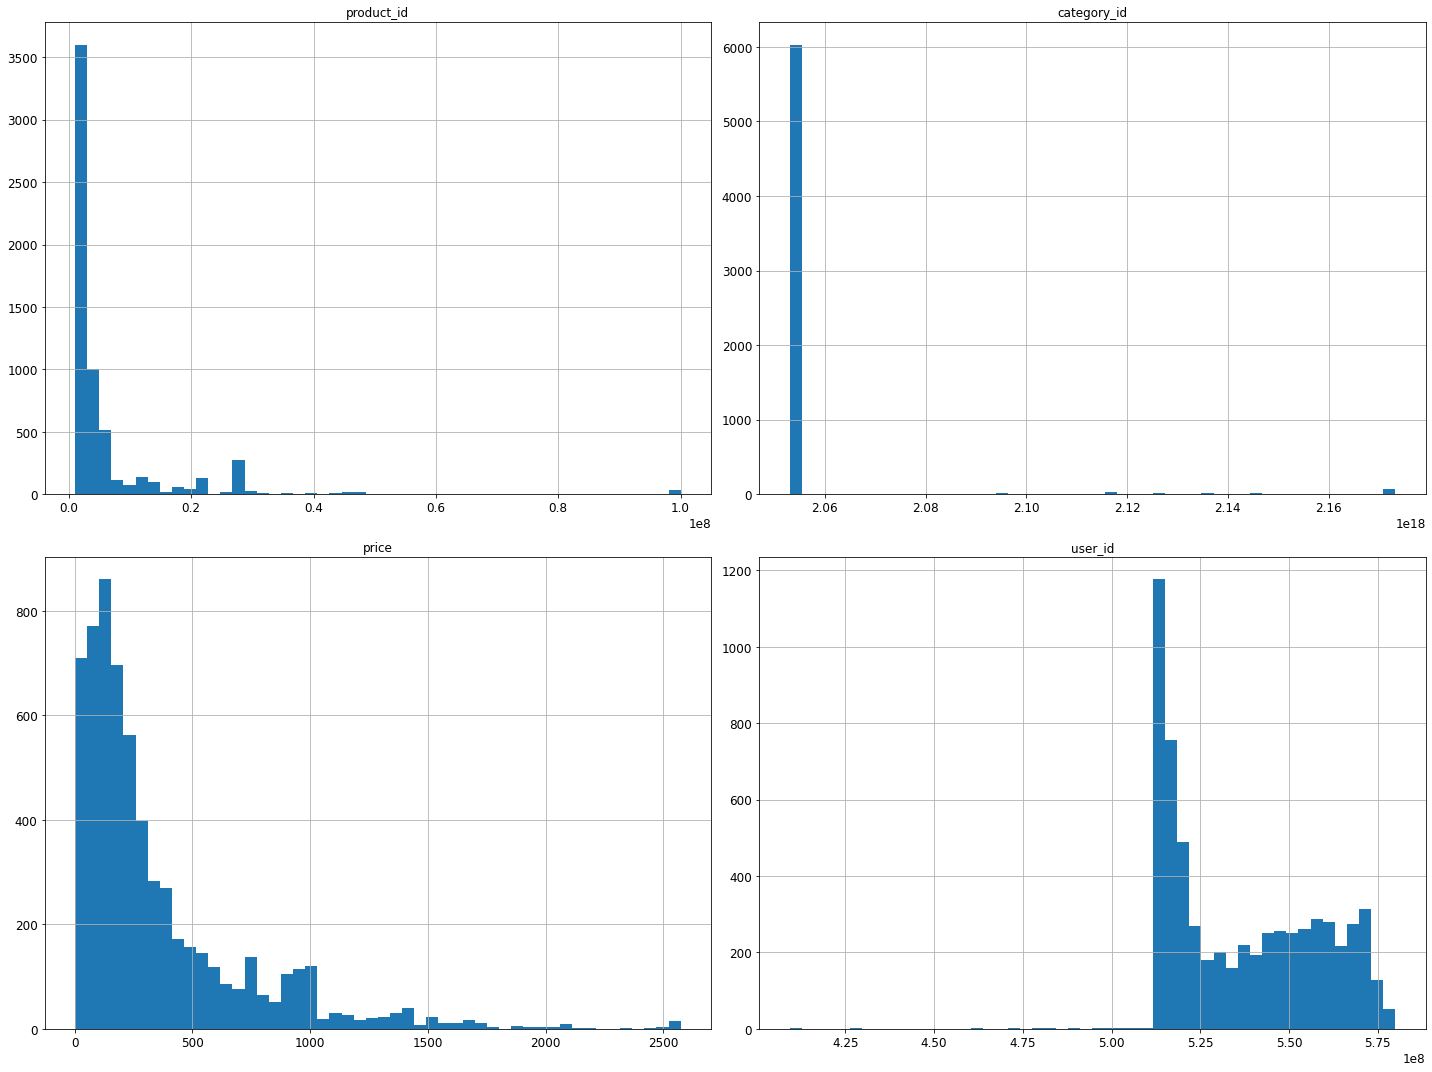

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [83]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X, Y)
clf.score(X, Y)

0.939145793192036